In [2]:
from google.colab import drive
drive.mount('/content/drive')
#Mounting of google drive

Mounted at /content/drive


In [ ]:
#/content/drive/MyDrive/Machine learning/smart_home_device_usage_data.csv

In [3]:
import pandas as pd #for handling and analyzing structured data like csv files
import seaborn as sns #For visualiztion of data
import matplotlib.pyplot as plt #for plotting the data

In [4]:
#reading of csv file
data=pd.read_csv("/content/drive/MyDrive/Machine learning/smart_home_device_usage_data.csv")

In [5]:
#viewing the initial 10 entries
data.head(10)

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
5,6,Thermostat,3.422127,5.038625,1,0,3,1
6,7,Security System,21.065640,2.229344,0,0,56,0
7,8,Security System,23.317096,2.791421,0,0,53,0
8,9,Security System,4.663108,1.780082,1,2,23,1
9,10,Camera,17.468553,7.212756,1,4,58,0


In [6]:
data.shape #to get the size of the file

(5403, 8)

In [7]:
data.info()# this to identify the null values/categorical and numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [8]:
data.isna().sum()# checking the skewness of the data

,0
UserID,0
DeviceType,0
UsageHoursPerDay,0
EnergyConsumption,0
UserPreferences,0
MalfunctionIncidents,0
DeviceAgeMonths,0
SmartHomeEfficiency,0


In [9]:
data.describe()# this will describe the data for more view and analyze the data

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [10]:
data.columns #columns review for easy handling

Index(['UserID', 'DeviceType', 'UsageHoursPerDay', 'EnergyConsumption',
       'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths',
       'SmartHomeEfficiency'],
      dtype='object')

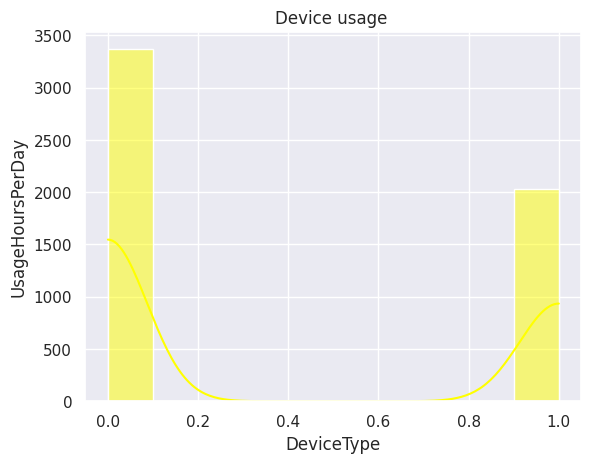

In [11]:
sns.set_theme(style="darkgrid")#make bg dark with gridlines
sns.histplot(data['SmartHomeEfficiency'],color="yellow",bins=10,kde=True)# bins divide data into 10 interval,kde for smooth curve
plt.title('Device usage ')
plt.xlabel('DeviceType')
plt.ylabel('UsageHoursPerDay')
plt.show()

In [ ]:
#this histogram shows that 2000 users are highly efficient

#3400 users are inefficient

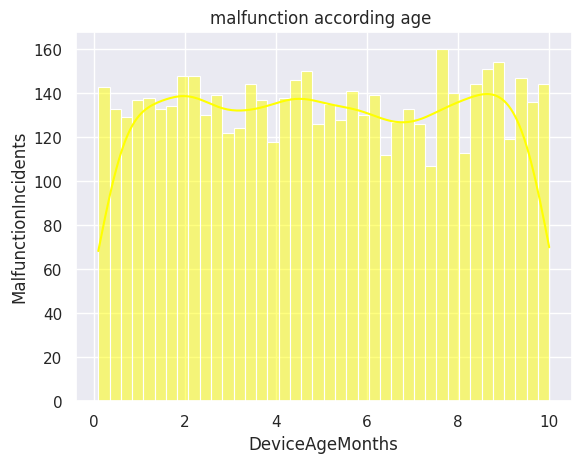

In [12]:
sns.set_theme(style="darkgrid")
sns.histplot(data['EnergyConsumption'],color="yellow",bins=40,kde=True)
plt.title('malfunction according age ')
plt.xlabel('DeviceAgeMonths')
plt.ylabel('MalfunctionIncidents')
plt.show()

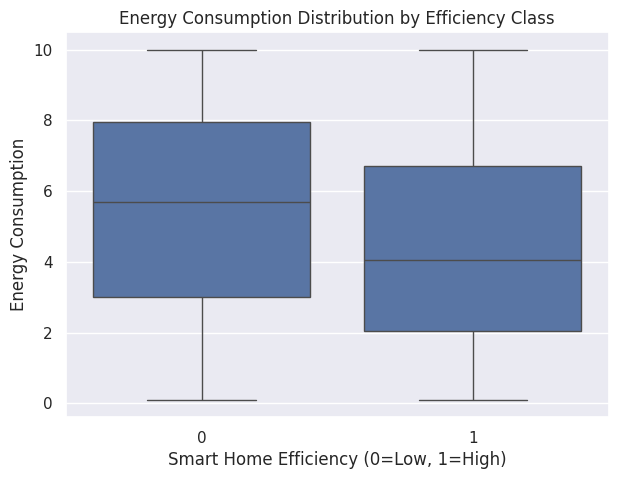

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(x='SmartHomeEfficiency', y='EnergyConsumption',data=data)
plt.title('Energy Consumption Distribution by Efficiency Class')
plt.xlabel('Smart Home Efficiency (0=Low, 1=High)')
plt.ylabel('Energy Consumption')
plt.show()


In [ ]:
#as 1 the high efficiency median is lower than the 0 it confirms that smart home optimization is actually reducing energy use.

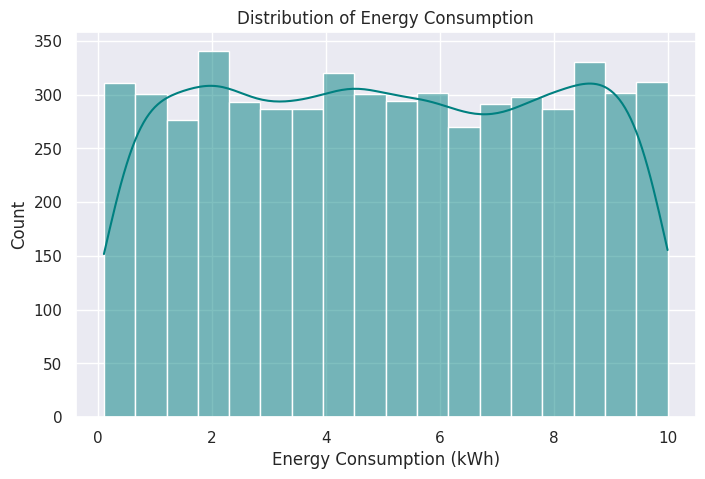

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data['EnergyConsumption'], kde=True, color='teal')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Count')
plt.show()


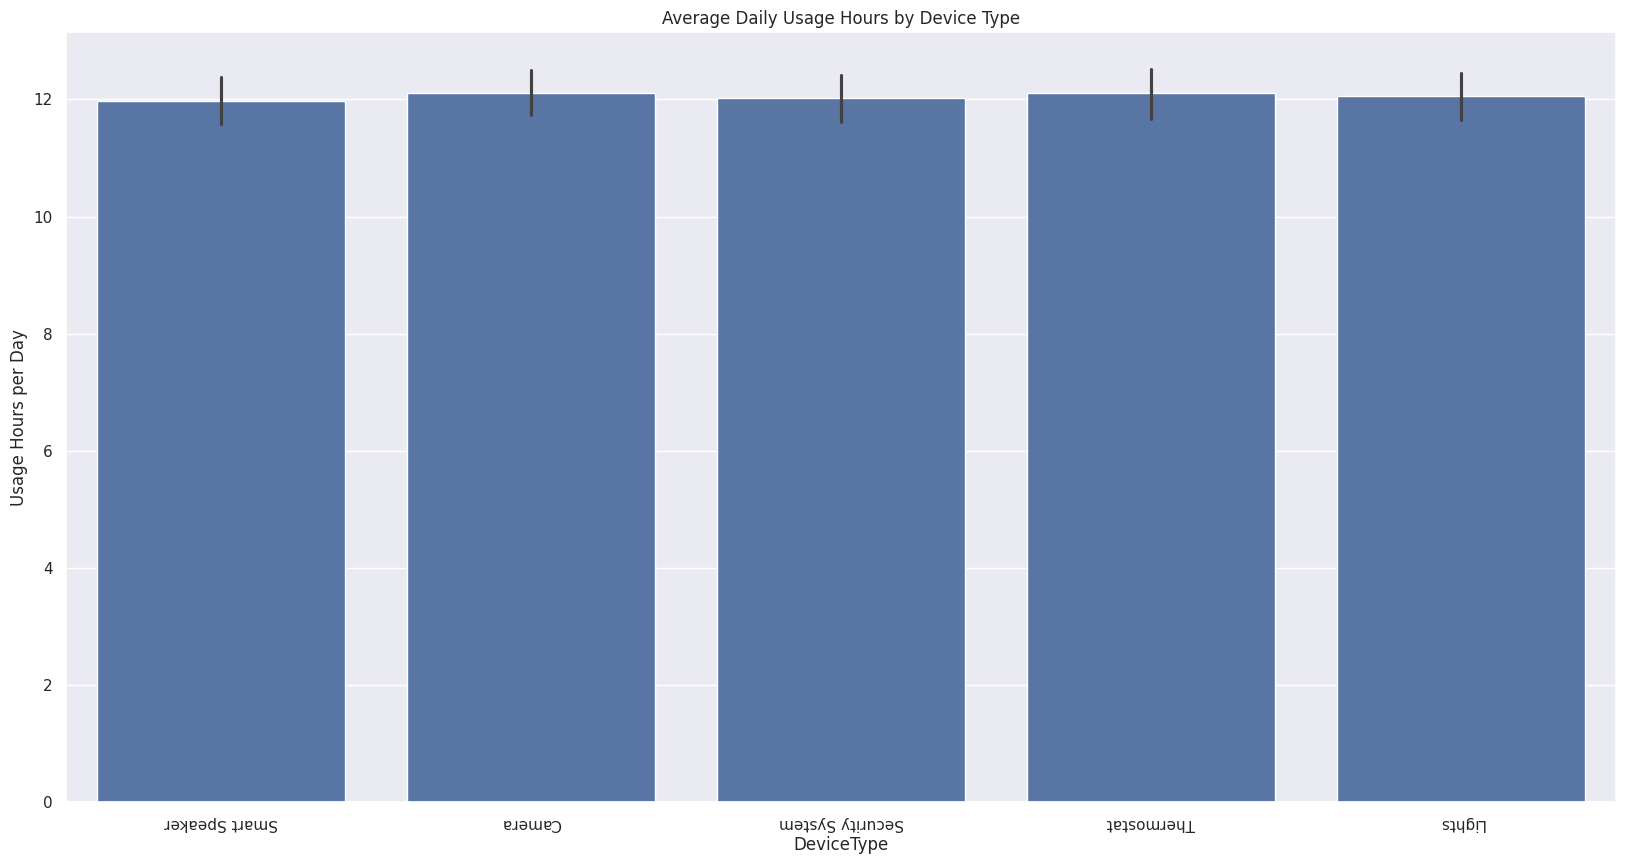

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x='DeviceType', y='UsageHoursPerDay', data=data,estimator= "mean")
plt.title('Average Daily Usage Hours by Device Type')
plt.xticks(rotation=180)#for readability and a neat appearance.
plt.ylabel('Usage Hours per Day')
plt.show()


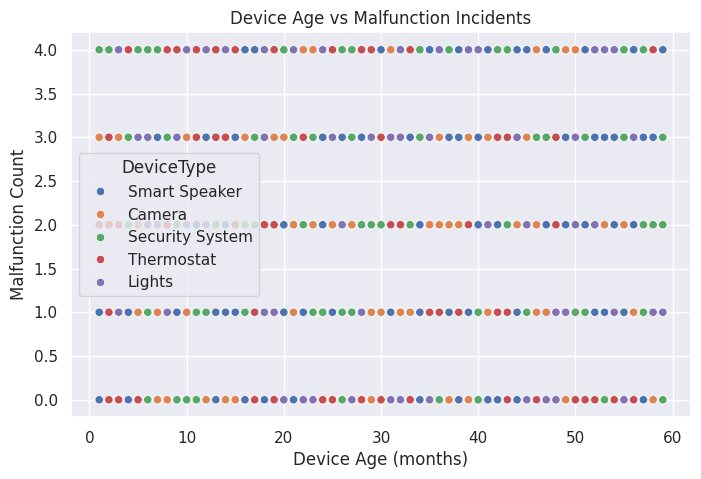

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='DeviceAgeMonths', y='MalfunctionIncidents', hue='DeviceType', data=data)
plt.title('Device Age vs Malfunction Incidents')
plt.xlabel('Device Age (months)')
plt.ylabel('Malfunction Count')
plt.show()


In [17]:
#for an heat map we need all numerical data but the device type column is a categorical data so using label encoder we change it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['DeviceTypeEncoded'] = le.fit_transform(data['DeviceType'])

In [ ]:
data.head(20)

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,DeviceTypeEncoded
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1,3
1,2,Camera,19.973343,8.610689,1,0,29,1,0
2,3,Security System,18.911535,2.651777,1,0,20,1,2
3,4,Camera,7.011127,2.341653,0,3,15,0,0
4,5,Camera,22.610684,4.859069,1,3,36,1,0
5,6,Thermostat,3.422127,5.038625,1,0,3,1,4
6,7,Security System,21.065640,2.229344,0,0,56,0,2
7,8,Security System,23.317096,2.791421,0,0,53,0,2
8,9,Security System,4.663108,1.780082,1,2,23,1,2
9,10,Camera,17.468553,7.212756,1,4,58,0,0


In [ ]:
#Camera=0
#Lights=1
#Security system=2
#Smart speaker=3
#Thermostat=4

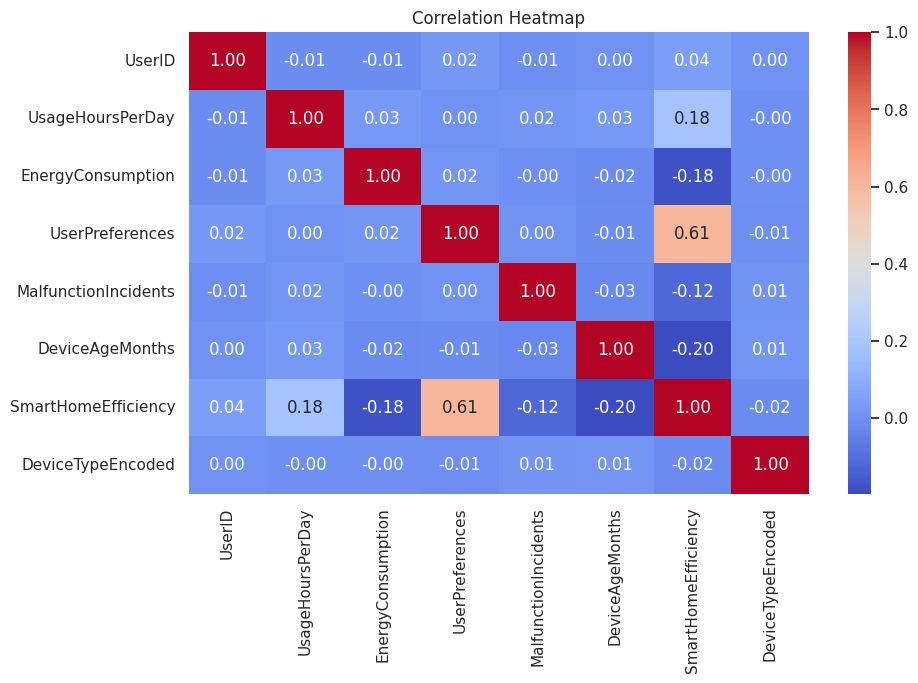

In [18]:
plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [19]:
import plotly.express as px # library import for interactive visualization

fig = px.scatter(data, x='UsageHoursPerDay', y='EnergyConsumption', color='DeviceType',
                 size='MalfunctionIncidents', hover_data=['DeviceAgeMonths'],
                 title='Device Usage vs Energy Consumption (Interactive)')
fig.show()


In [20]:
print("🔹 Device with highest average energy consumption:",
      data.groupby('DeviceType')['EnergyConsumption'].mean().idxmax())

print("🔹 Average usage hours per day:",
      round(data['UsageHoursPerDay'].mean(), 2))

print("🔹 Most common malfunction count:",
      data['MalfunctionIncidents'].mode()[0])

print("🔹 Correlation between energy & efficiency:",
      round(data['EnergyConsumption'].corr(data['SmartHomeEfficiency']), 2))


🔹 Device with highest average energy consumption: Thermostat
🔹 Average usage hours per day: 12.05
🔹 Most common malfunction count: 4
🔹 Correlation between energy & efficiency: -0.18


In [21]:
fig = px.pie(data, names='DeviceType',
              title='Device Type Distribution in Smart Homes',
              hole=0.3,
              color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [22]:
fig = px.histogram(data, x='UserPreferences', color='SmartHomeEfficiency',
                   barmode='group',
                   title='User Preference vs SmartHome Efficiency')
fig.update_xaxes(title='User Preferences (1=Smart, 0=Basic)')
fig.show()


In [23]:
from sklearn.model_selection import train_test_split  # to split dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # for encoding & scaling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # to evaluate model
from xgboost import XGBClassifier  # our classification model


In [51]:
X = data[['UsageHoursPerDay', 'EnergyConsumption', 'UserPreferences',
        'MalfunctionIncidents', 'DeviceAgeMonths', 'DeviceTypeEncoded']]
y = data['SmartHomeEfficiency']

# Normalize data for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (75% training, 25% testing) - Adjusted to match Random Forest split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [52]:
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [53]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", acc)

XGBoost Accuracy: 0.9526276831976314


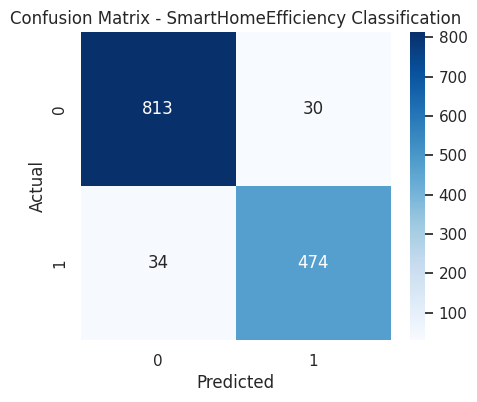

In [54]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SmartHomeEfficiency Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/tmp/ipython-input-1029122045.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




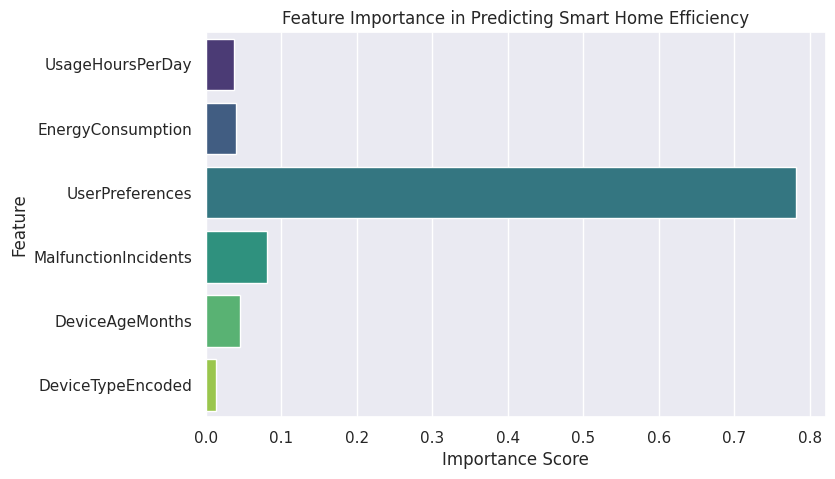

In [55]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance in Predicting Smart Home Efficiency')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
# this show what factor affect the prediction more so help business to focus on that factor

In [56]:
imp_data= pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Top Drivers of Smart Home Efficiency:\n", imp_data.head(5))

print("\n🔍 Insight Summary:")
print("- UsageHoursPerDay and EnergyConsumption strongly impact efficiency.")
print("- Devices with higher malfunction incidents show reduced efficiency.")
print("- Device age has moderate effect; newer devices tend to perform better.")
print("- Model accuracy and interpretability are strong for operational deployment.")


Top Drivers of Smart Home Efficiency:
                 Feature  Importance
2       UserPreferences    0.781653
3  MalfunctionIncidents    0.081651
4       DeviceAgeMonths    0.045092
1     EnergyConsumption    0.039912
0      UsageHoursPerDay    0.037512

🔍 Insight Summary:
- UsageHoursPerDay and EnergyConsumption strongly impact efficiency.
- Devices with higher malfunction incidents show reduced efficiency.
- Device age has moderate effect; newer devices tend to perform better.
- Model accuracy and interpretability are strong for operational deployment.


In [ ]:
# we done checking the model with XG BOOST now we check model with ramdom forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
#train-test split if data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
yrf_pred = rf_model.predict(X_test)


In [58]:
# Accuracy score
rfacc = accuracy_score(y_test, yrf_pred)
print(f"Model Accuracy: {rfacc*100:.2f}%")

# Classification Report
print(classification_report(y_test, yrf_pred))


Model Accuracy: 95.78%
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       843
           1       0.95      0.94      0.94       508

    accuracy                           0.96      1351
   macro avg       0.96      0.95      0.95      1351
weighted avg       0.96      0.96      0.96      1351



In [59]:
import plotly.figure_factory as ff# create heatmap and chart more designed manner
cm = confusion_matrix(y_test, yrf_pred)
labels = ["Inefficient", "Efficient"]

fig = ff.create_annotated_heatmap(
    z=cm, x=labels, y=labels,
    colorscale='Blues', showscale=True)
fig.update_layout(title='Confusion Matrix - SmartHome Efficiency Prediction')
fig.show()


In [60]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

fig = px.bar(feat_imp, x='Importance', y='Feature',
             orientation='h',
             title='Feature Importance - What Drives SmartHome Efficiency?',
             color='Importance', color_continuous_scale='Bluered')
fig.show()


In [61]:
print("🎯 Model Comparison Summary:")
print(f"Random Forest Accuracy: {rfacc*100:.2f}%")
print(f"XGBoost Accuracy: {acc*100:.2f}%")

if acc > rfacc:
    print("\n✅ XGBoost performs better for this dataset.")
else:
    print("\n✅ Random Forest performs better for this dataset.")


🎯 Model Comparison Summary:
Random Forest Accuracy: 95.78%
XGBoost Accuracy: 95.26%

✅ Random Forest performs better for this dataset.


In [ ]:
import joblib# for saving the model
joblib.dump(model,"smart_home_device_usage_model.pkl")

['smart_home_device_usage_model.pkl']

In [ ]:
from google.colab import files# for downloading
files.download("smart_home_device_usage_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

In [ ]:
model=joblib.load("smart_home_device_usage_model.pkl")

In [63]:
data.describe

<bound method NDFrame.describe of       UserID       DeviceType  UsageHoursPerDay  EnergyConsumption  \
0          1    Smart Speaker         15.307188           1.961607   
1          2           Camera         19.973343           8.610689   
2          3  Security System         18.911535           2.651777   
3          4           Camera          7.011127           2.341653   
4          5           Camera         22.610684           4.859069   
...      ...              ...               ...                ...   
5398    5399       Thermostat          4.556314           5.871764   
5399    5400           Lights          0.561856           1.555992   
5400    5401    Smart Speaker         11.096236           7.677779   
5401    5402  Security System          8.782169           7.467929   
5402    5403       Thermostat         13.540381           9.043076   

      UserPreferences  MalfunctionIncidents  DeviceAgeMonths  \
0                   1                     4               36   
1                   1                     0               29   
2                   1                     0               20   
3                   0                     3               15   
4                   1                     3               36   
...               ...                   ...              ...   
5398                1                     0               28   
5399                1                     4               24   
5400                0                     0               42   
5401                0                     2               28   
5402                0                     0               30   

      SmartHomeEfficiency  DeviceTypeEncoded  
0                       1                  3  
1                       1                  0  
2                       1                  2  
3                       0                  0  
4                       1                  0  
...                   ...                ...  
5398                    0                  4  
5399                    0                  1  
5400                    0                  3  
5401                    1                  2  
5402                    0                  4  

[5403 rows x 9 columns]>

In [64]:
data.head(15)

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,DeviceTypeEncoded
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1,3
1,2,Camera,19.973343,8.610689,1,0,29,1,0
2,3,Security System,18.911535,2.651777,1,0,20,1,2
3,4,Camera,7.011127,2.341653,0,3,15,0,0
4,5,Camera,22.610684,4.859069,1,3,36,1,0
5,6,Thermostat,3.422127,5.038625,1,0,3,1,4
6,7,Security System,21.065640,2.229344,0,0,56,0,2
7,8,Security System,23.317096,2.791421,0,0,53,0,2
8,9,Security System,4.663108,1.780082,1,2,23,1,2
9,10,Camera,17.468553,7.212756,1,4,58,0,0
